#### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyecharts as pch
from itertools import combinations
import sympy
import scipy
from scipy import special
import warnings
from scipy import stats


plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore')

#### 随机数
随机数生成


In [ ]:
# 随机整数np.random.randint(x,y), 生成[x,y)
dict = {1:"甘诗晨",2:"韩雨洋",3:"罗兴春",4:"毛沛炫",5:"潘宇航",6:"徐嘉晟",7:"周家瑞"}
key = np.random.randint(1,8)
print(dict[key])


#### 词向量内积
行向量点乘

随机抽取样本并重复n次

In [ ]:
# import pandas as pd
# import numpy as np
# from itertools import combinations
# import seaborn as sns
# import matplotlib.pyplot as plt

df = pd.read_csv('glove.csv')
df.set_index('V1',inplace=True)


def get_row_index(df, row_name):
    return df.index.get_loc(row_name)

def dot_product(df, Row1, Row2):
    return df.loc[Row1].dot(df.loc[Row2])

def normalizeSum(row):
    return row / np.sqrt(np.sum(row**2))

def normalizeMean(row):
    return row / np.sqrt(np.mean(row**2))

df_normalizedMean = df.apply(normalizeMean, axis=1)

#找到最大最小点乘的向量

max,min,maxDot,minDot,temp = [0,0,0,0,0]

for index, row in df_normalizedMean.iterrows():
    temp = row.dot(df_normalizedMean.iloc[2926])
    if (temp > maxDot) & (index != 'dog') :
        maxDot = temp
        max = get_row_index(df_normalizedMean,index)
        maxIndex = index
    elif temp < minDot :
        minDot = temp
        min = get_row_index(df_normalizedMean,index)
        minIndex = index
print(f'maxIndex = {maxIndex}')
print(f'minIndex = {minIndex}')

averages = []
for _ in range(100):  # 重复100次
    vectors = df_normalizedMean.sample(10)  # 随机选择10个向量
    inner_products = []  # 存储这10个向量之间的所有内积

    for v1, v2 in combinations(vectors.values, 2):  # 计算每两个向量之间的内积
        inner_product = np.dot(v1, v2)
        inner_products.append(inner_product)

    average = np.mean(inner_products)  # 计算所有内积的平均值
    averages.append(average)

overall_average = np.mean(averages)  # 计算100次迭代的平均内积的平均值
overall_std = np.std(averages)
print(overall_average)
print(overall_std)

# 将数组转换为DataFrame
result = pd.DataFrame(averages, columns=['Values'])

fig = plt.figure(figsize=(3.5,5))
sns.violinplot(y=result['Values'],width=0.5,inner='box')


plt.show()



In [ ]:
count = []
for i in range(1000):
    key = np.random.randint(1,11)
    count.append(key)
plt.hist(count)


In [ ]:
x1 = np.arange(0,12,2)
y1 = [15,66,92,54,23,17]
sns.set_theme(style="ticks")
fig, axes = plt.subplots(1,1,figsize=(8,8))

sns.set_theme(style="ticks")

fig = sns.lineplot(x=x1, y=y1,label='accuracy',markers='circle' )
fig = sns.lineplot(x = [-1,11],y =[16.667,16.667],dashes=True,label ='chance performance' )

# fig4 = sns.lineplot(x=dfClean['age'], y=dfClean['TIPI'],label = 'TIPI',ax=axes[0,0])
fig.set_title('')
fig.set_xlabel('μ')
fig.set_ylabel('accuracy')
fig.set_ylim([0,100])
fig.set_xlim([-1,11])
fig.set_yticks(np.arange(10,110,10))
# fig.set_xlim([0,1])
fig.margins(x = 0.1,y = 0.5)


In [ ]:
x = [0.16,0.66,0.94,0.56,0.24,0.17]
y = [0.20,0.64,0.86,0.60,0.30,0.15]
x_norm = stats.norm.ppf(x)
y_norm = stats.norm.ppf(y)

fig, ax = plt.subplots()
p = np.polyfit(x_norm, y_norm, 1)
plt.xlim([-2,2])
plt.ylim([-1.5,1.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 创建散点图
plt.scatter(x_norm, y_norm)

# 添加回归线
plt.plot(x_norm, np.polyval(p, x_norm), 'r-')
plt.ylabel('实际识别准确率Z分数', font={'family':'SongTi_GB2312','size':16},labelpad=10,linespacing = 1.3)
plt.xlabel('预期识别准确率Z分数',font={'family':'SongTi_GB2312','size':16},labelpad=10,linespacing = 1.6)

plt.show()

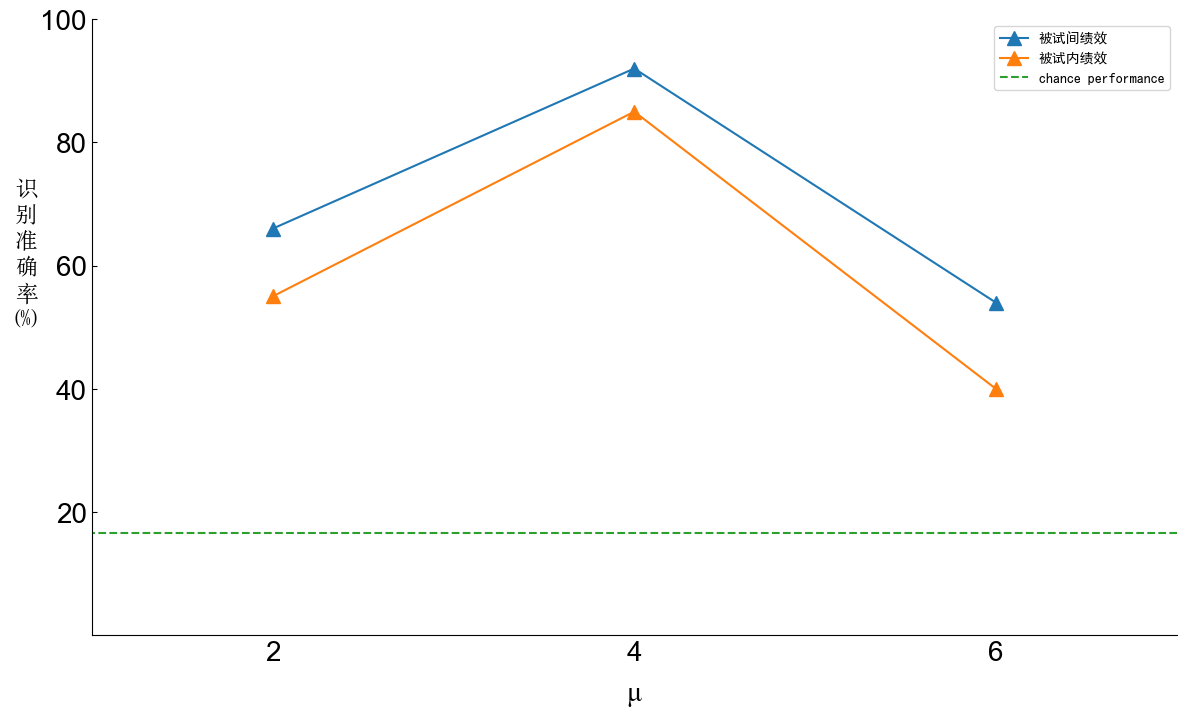

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(w=14,h=8)
# str = np.arange(0,12,2)
ax.set(xlim=(1,7), xticks=np.linspace(2,6,3),ylim=(0,100), yticks=np.linspace(20,100,5 ))

plt.plot([2,4,6],[66,92,54],marker ='^',markersize = 10)
plt.plot([2,4,6],[55,85,40],marker ='^',markersize = 10)
plt.plot([-1,11],[16.67,16.67],'--')
plt.legend(['被试间绩效','被试内绩效','chance performance'])
plt.tick_params(labelsize=20,bottom = False)

labels = ax.get_xticklabels()+ ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.ylabel('识\n别\n准\n确\n率\n(%)', font={'family':'SongTi_GB2312','size':16},rotation = 360,labelpad=10,linespacing = 1.3)
plt.xlabel('μ',font={'family':'Times New Roman','size':20},rotation = 360,labelpad=10,linespacing = 1.6)
ax.tick_params('both', which='major', direction='in')



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(w=12,h=10)
str = np.arange(0,12,2)
ax.set(xlim=(-1,11), xticks=np.linspace(0,10,6),ylim=(-12,12), yticks=np.linspace(-10,10,5 ))

plt.plot([0,2,4,6,8,10],[-7,5,-3,6,2,-4],marker ='^',markersize = 10)
plt.plot([-1,11],[0,0],'--')
plt.legend(['accuracy','chance performance'])
plt.tick_params(labelsize=20,bottom = False)

labels = ax.get_xticklabels()+ ax.get_yticklabels()
[label.set_fontname('Arial') for label in labels]
plt.ylabel('预\n期\n准\n确\n率\n|\n真\n实\n准\n确\n率\n(%)', font={'family':'SongTi_GB2312','size':16},rotation = 360,labelpad=10,linespacing = 1.3)
plt.xlabel('μ',font={'family':'Times New Roman','size':20},rotation = 360,labelpad=10,linespacing = 1.6)
ax.tick_params('both', which='major', direction='in')



ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

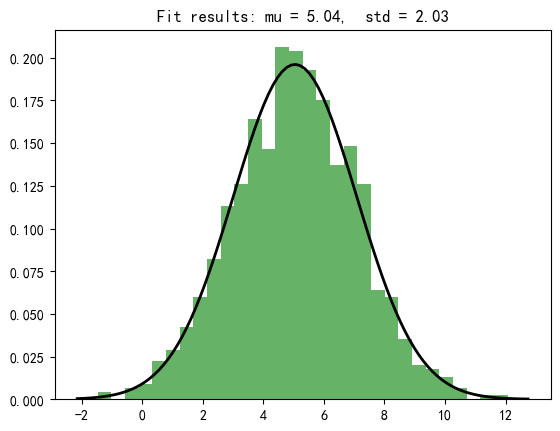

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 生成一些随机数据
data = np.random.normal(loc=5, scale=2, size=1000)

# 计算极大似然估计的参数
mu, std = norm.fit(data)

# 绘制直方图
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# 绘制拟合的正态分布曲线
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()
